In [1]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 66.0 MB/s eta 0:00:00


In [2]:
!mkdir -p /content/HOME/weights
!wget -P /content/HOME/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P /content/HOME/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P /content/HOME/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P /content/HOME/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P /content/HOME/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P /content/HOME/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh /content/HOME/weights

total 408M
-rw-r--r-- 1 root root  80M May 23 09:38 yolov10b.pt
-rw-r--r-- 1 root root 100M May 23 09:38 yolov10l.pt
-rw-r--r-- 1 root root  64M May 23 09:38 yolov10m.pt
-rw-r--r-- 1 root root  11M May 23 09:38 yolov10n.pt
-rw-r--r-- 1 root root  32M May 23 09:38 yolov10s.pt
-rw-r--r-- 1 root root 123M May 23 09:38 yolov10x.pt


In [ ]:
!pip install supervision

In [8]:
from ultralytics import YOLOv10

model = YOLOv10(f'/content/HOME/weights/yolov10n.pt')
results = model(source=f'/content/HOME/data/dog.jpeg', conf=0.25)
print(results[0].boxes.xyxy)


image 1/1 /content/HOME/data/dog.jpeg: 640x384 1 0, 1 16, 40.0ms
Speed: 2.0ms preprocess, 40.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)
tensor([[6.7041e+01, 2.5264e+02, 6.4549e+02, 9.6621e+02],
        [7.4646e-01, 3.4156e+02, 5.4170e+02, 1.2773e+03]], device='cuda:0')


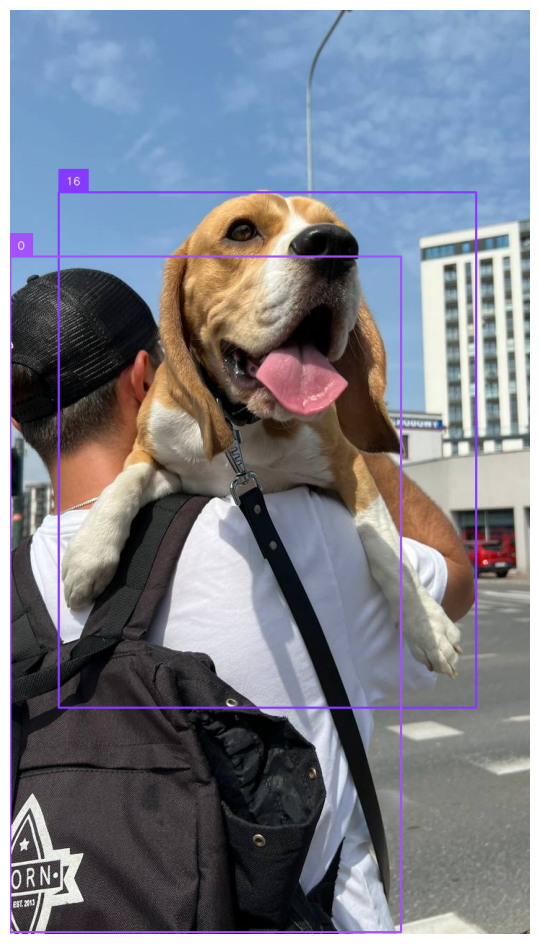

In [12]:
import cv2
import supervision as sv

detections = sv.Detections.from_ultralytics(results[0])

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
image=cv2.imread(f'/content/HOME/data/dog.jpeg')
annotated_image = bounding_box_annotator.annotate(
	scene=image, detections=detections)
annotated_image = label_annotator.annotate(
	scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [13]:
!mkdir /content/HOME/datasets
%cd /content/HOME/datasets

!pip install -q roboflow

from roboflow import Roboflow

ROBOFLOW_API_KEY = "S3c8xf9nNs8FyCmgKLZj"

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("jumbokh").project("football-players-detection-3zvbc")
dataset = project.version(1).download("yolov8")

/content/HOME/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to football-players-detection-1 in yolov8:: 100%|██████████| 1338/1338 [00:00<00:00, 2295.68it/s]


In [ ]:
#/root/.config/yolov10/settings.yaml

In [18]:
%cd /content/HOME
!yolo task=detect mode=train epochs=25 batch=32 plots=True \
model=/content/HOME/weights/yolov10n.pt \
data=/content/HOME/datasets/football-players-detection-1/data.yaml

/content/HOME
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/HOME/weights/yolov10n.pt, data=/content/HOME/datasets/football-players-detection-1/data.yaml, epochs=25, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False

In [16]:
%cd /content/HOME
from IPython.display import Image # Import the Image class
Image(filename=f'/content/HOME/runs/detect/train/confusion_matrix.png', width=600)

/content/HOME


FileNotFoundError: [Errno 2] No such file or directory: '/content/HOME/runs/detect/train/confusion_matrix.png'

In [15]:
%cd /content/HOME
Image(filename=f'/content/HOME/runs/detect/train/confusion_matrix.png', width=600)

/content/HOME


NameError: name 'Image' is not defined